In [1]:
# best 3 solutions based on EXP1 in turns of f1 micro is:
# XGBcls: RoadNet+Social type, 0.6561797753
# BAGcls: RoadNet+Social type, 0.6539325843
# RFreg: RoadNet+Social total, 0.6494382022
# with ~2014, min-max, no feature selection

In [2]:
from src.experiment_based_function import SEEDS
import pandas as pd
%matplotlib inline

In [3]:
import os
import glob
from zipfile import ZipFile
import re
from pandas.compat import StringIO

In [4]:
eval_or_grid='eval'

In [5]:
def get_exp4_result(eval_or_grid='eval', zipname='exp4+RFreg-res.zip'):
    res = []    
    with ZipFile('experiment_1001/'+zipname) as myzip:
        for fn in myzip.namelist():
            if not re.match('.*/%s_res.csv' % eval_or_grid, fn):
                continue
            _, qa, seed, _ = fn.split('/')
            q, a = qa.split('#')
            seed = seed.replace('seed_', '')

            df = pd.read_csv(StringIO(myzip.read(fn).decode('utf-8')), index_col=0)
            df['q'] = q
            df['a'] = a
            df['seed'] = seed
            res.append(df)
    return pd.concat(res)

In [6]:
eval_res = get_exp4_result('eval', 'exp4-XGB-BAG-GDB.zip')

In [7]:
eval_res.columns, eval_res.shape

(Index(['#ftr_all', '#ftr_keep', '#test_sample', '#train_sample',
        'feature_selection', 'ftr_combo_name', 'model_name', 'test_acc',
        'test_f1_macro', 'test_f1_micro', 'test_f1_weighted', 'test_mse',
        'test_n_classes', 'train_acc', 'train_f1_macro', 'train_f1_micro',
        'train_f1_weighted', 'train_mse', 'train_n_classes', 'upsample',
        'y_dist', 'y_dist_up', 'q', 'a', 'seed'],
       dtype='object'), (3300, 25))

In [8]:
eval_res = eval_res[eval_res.model_name!='GDBcls']
eval_res.shape

(2200, 25)

In [9]:
print('train', eval_res.train_n_classes.value_counts().to_dict())
print('test', eval_res.test_n_classes.value_counts().to_dict())

print('train', 'test')
print(eval_res.apply(lambda x: (x.train_n_classes, x.test_n_classes), axis=1).value_counts())

train {5: 2190, 4: 10}
test {5: 1230, 4: 860, 3: 110}
train test
(5, 5)    1230
(5, 4)     850
(5, 3)     110
(4, 4)      10
dtype: int64


In [10]:
f1_choices = ['test_f1_weighted', 'test_f1_macro', 'test_f1_micro']

In [11]:
keys = ['q', 'a', 'upsample', 'ftr_combo_name', 'model_name', 'feature_selection']


In [12]:
info = eval_res.groupby(['q','a','upsample']).mean()[['#test_sample', '#train_sample','test_n_classes','train_n_classes', ]]

In [13]:
means = eval_res.groupby(keys).mean()[f1_choices]
stds = eval_res.groupby(keys).std()[f1_choices]
means = means.reset_index().merge(info.reset_index(), how='left').set_index(keys)

f1_type = test_f1_micro


test_f1_micro  \
q                a                upsample ftr_combo_name                 model_name feature_selection                  
household_income $150,000 or more None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                    0.608333   
                                           RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                    0.597222   
experienceLevel  fearless         None     RoadNet+Segment_TOTAL_~2014    XGBcls     None                    0.587179   
                                                                          RFreg      None                    0.584615   
                                           RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                    0.580769   
                                           RoadNet                        RFreg      None                    0.579487   
                                                                          BAGcls     None                    0.576923   
                                           RoadNet+Segment_TOTAL_~2014    BAGcls     None                    0.575641   
                 interested       None     RoadNet                        RFreg      None                    0.575000   
household_income $150,000 or more None     RoadNet                        BAGcls     None                    0.572222   

                                                                                                        #test_sample  \
q                a                upsample ftr_combo_name                 model_name feature_selection                 
household_income $150,000 or more None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                       72.0   
                                           RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                       72.0   
experienceLevel  fearless         None     RoadNet+Segment_TOTAL_~2014    XGBcls     None                       78.0   
                                                                          RFreg      None                       78.0   
                                           RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                       78.0   
                                           RoadNet                        RFreg      None                       78.0   
                                                                          BAGcls     None                       78.0   
                                           RoadNet+Segment_TOTAL_~2014    BAGcls     None                       78.0   
                 interested       None     RoadNet                        RFreg      None                       24.0   
household_income $150,000 or more None     RoadNet                        BAGcls     None                       72.0   

                                                                                                        #train_sample  \
q                a                upsample ftr_combo_name                 model_name feature_selection                  
household_income $150,000 or more None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                       288.0   
                                           RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                       288.0   
experienceLevel  fearless         None     RoadNet+Segment_TOTAL_~2014    XGBcls     None                       310.0   
                                                                          RFreg      None                       310.0   
                                           RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                       310.0   
                                           RoadNet                        RFreg      None                       310.0   
                                                                          BAGcls     None                       310.0   
                                           RoadNet+Segment_TOTAL_~2014    BAGcls     None                       310.0   


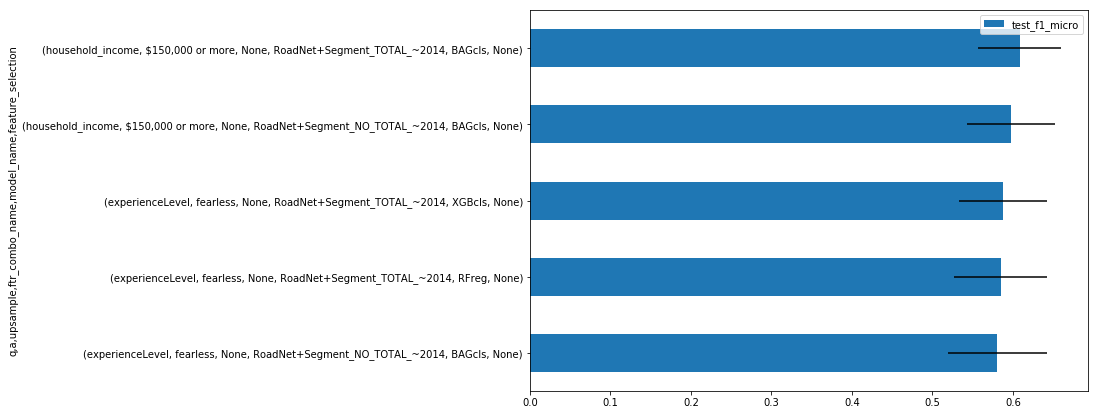

In [44]:
f1_type = f1_choices[2]
print('f1_type =', f1_type)

means_to_plot = means[[f1_type]].sort_values(f1_type, ascending=True)
stds_to_plot = stds[[f1_type]]

df_top_n = 10
plot_top_n = 5
means_to_plot.iloc[-plot_top_n:].plot(kind='barh', figsize=(10,7), xerr=stds_to_plot)
means.loc[means_to_plot.iloc[:-(df_top_n+1):-1,:].index].drop([x for x in f1_choices if x != f1_type], axis=1)

f1_type = test_f1_micro


test_f1_micro  \
q                a                upsample ftr_combo_name                 model_name feature_selection                  
household_income $150,000 or more None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                    0.608333   
                                           RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                    0.597222   
experienceLevel  fearless         None     RoadNet+Segment_TOTAL_~2014    XGBcls     None                    0.587179   
                                                                          RFreg      None                    0.584615   
                                           RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                    0.580769   
                                           RoadNet                        RFreg      None                    0.579487   
                                                                          BAGcls     None                    0.576923   
                                           RoadNet+Segment_TOTAL_~2014    BAGcls     None                    0.575641   
                 interested       None     RoadNet                        RFreg      None                    0.575000   
household_income $150,000 or more None     RoadNet                        BAGcls     None                    0.572222   

                                                                                                        #test_sample  \
q                a                upsample ftr_combo_name                 model_name feature_selection                 
household_income $150,000 or more None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                       72.0   
                                           RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                       72.0   
experienceLevel  fearless         None     RoadNet+Segment_TOTAL_~2014    XGBcls     None                       78.0   
                                                                          RFreg      None                       78.0   
                                           RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                       78.0   
                                           RoadNet                        RFreg      None                       78.0   
                                                                          BAGcls     None                       78.0   
                                           RoadNet+Segment_TOTAL_~2014    BAGcls     None                       78.0   
                 interested       None     RoadNet                        RFreg      None                       24.0   
household_income $150,000 or more None     RoadNet                        BAGcls     None                       72.0   

                                                                                                        #train_sample  \
q                a                upsample ftr_combo_name                 model_name feature_selection                  
household_income $150,000 or more None     RoadNet+Segment_TOTAL_~2014    BAGcls     None                       288.0   
                                           RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                       288.0   
experienceLevel  fearless         None     RoadNet+Segment_TOTAL_~2014    XGBcls     None                       310.0   
                                                                          RFreg      None                       310.0   
                                           RoadNet+Segment_NO_TOTAL_~2014 BAGcls     None                       310.0   
                                           RoadNet                        RFreg      None                       310.0   
                                                                          BAGcls     None                       310.0   
                                           RoadNet+Segment_TOTAL_~2014    BAGcls     None                       310.0   


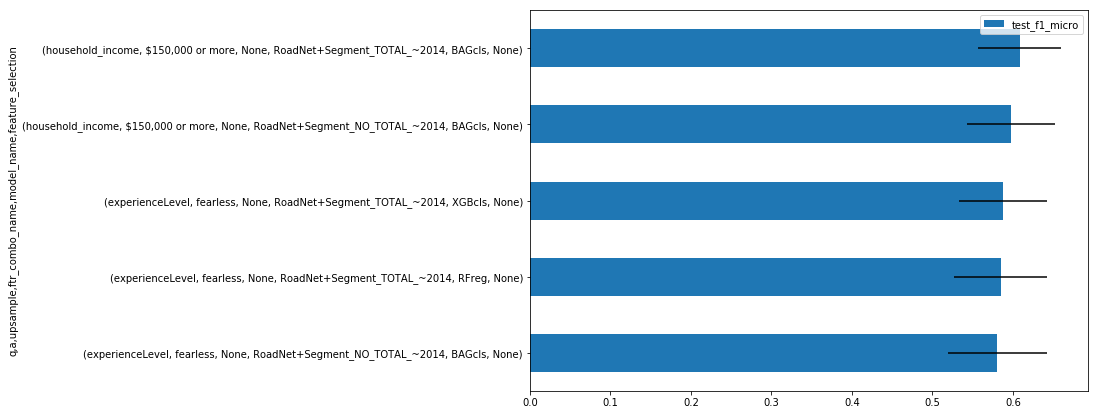

In [44]:
f1_type = f1_choices[2]
print('f1_type =', f1_type)

means_to_plot = means[[f1_type]].sort_values(f1_type, ascending=True)
stds_to_plot = stds[[f1_type]]

df_top_n = 10
plot_top_n = 5
means_to_plot.iloc[-plot_top_n:].plot(kind='barh', figsize=(10,7), xerr=stds_to_plot)
means.loc[means_to_plot.iloc[:-(df_top_n+1):-1,:].index].drop([x for x in f1_choices if x != f1_type], axis=1)

In [45]:
def get_paper_table(means, f1_type, key_cols):
    cols_name_convert = {'RoadNet': 'RoadNet', 'RoadNet+Segment_NO_TOTAL_~2014': 'RoadNet+Segment type',
     'RoadNet+Segment_TOTAL_~2014': 'RoadNet+Segment total', 'Segment_NO_TOTAL_~2014': 'Segment type',
     'Segment_TOTAL_~2014': 'Segment total'}
    means_for_pivot = means.reset_index()
    means_for_pivot['key'] = means_for_pivot.apply(lambda x: tuple([x[col] for col in key_cols]), axis=1)
    table = means_for_pivot.reset_index().pivot(index='key', columns='ftr_combo_name', values=f1_type)
    table.index = pd.MultiIndex.from_tuples(table.index, names=key_cols)    
    table.columns.name = f1_type
    table.columns = [cols_name_convert[col] for col in table.columns]
    return table[['RoadNet', 'Segment total', 'Segment type', 'RoadNet+Segment total', 'RoadNet+Segment type']]

In [46]:
key_cols = [k for k in keys if k!='ftr_combo_name']+['#test_sample', '#train_sample','test_n_classes','train_n_classes']
table = get_paper_table(means, f1_type, key_cols)

In [47]:
table.to_csv('deliverables/experiment_1001/exp4.csv', encoding='utf8')